In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-data-set/diabetes.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.metrics import classification_report
plt.style.use('fivethirtyeight')  # صح
import warnings
warnings.filterwarnings('ignore')





In [3]:
data=pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Explore Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.duplicated().sum()

0

In [8]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Analysis

In [9]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


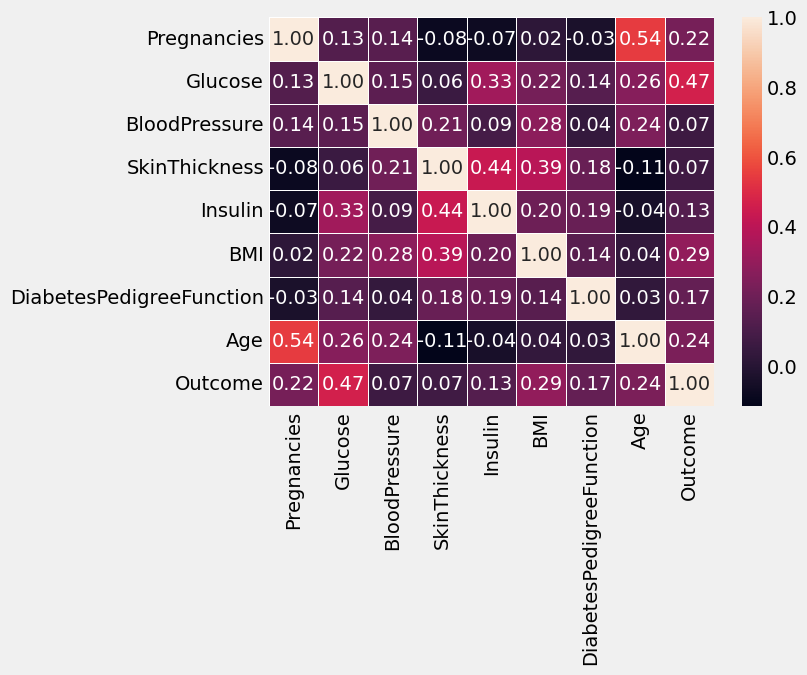

In [10]:
sns.heatmap(data.corr(),annot=True,fmt='0.2f',linewidth=.5)
plt.show()

In [11]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

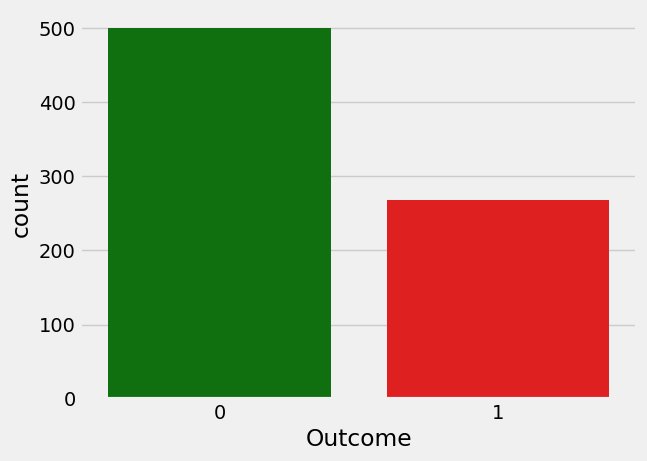

In [12]:
sns.countplot(data=data,x='Outcome',palette=['green','red'])
plt.show()

In [13]:
maxi=data[data['Outcome']==0]
mini=data[data['Outcome']==1]
maxi.shape,mini.shape
268/(500+268)

0.3489583333333333

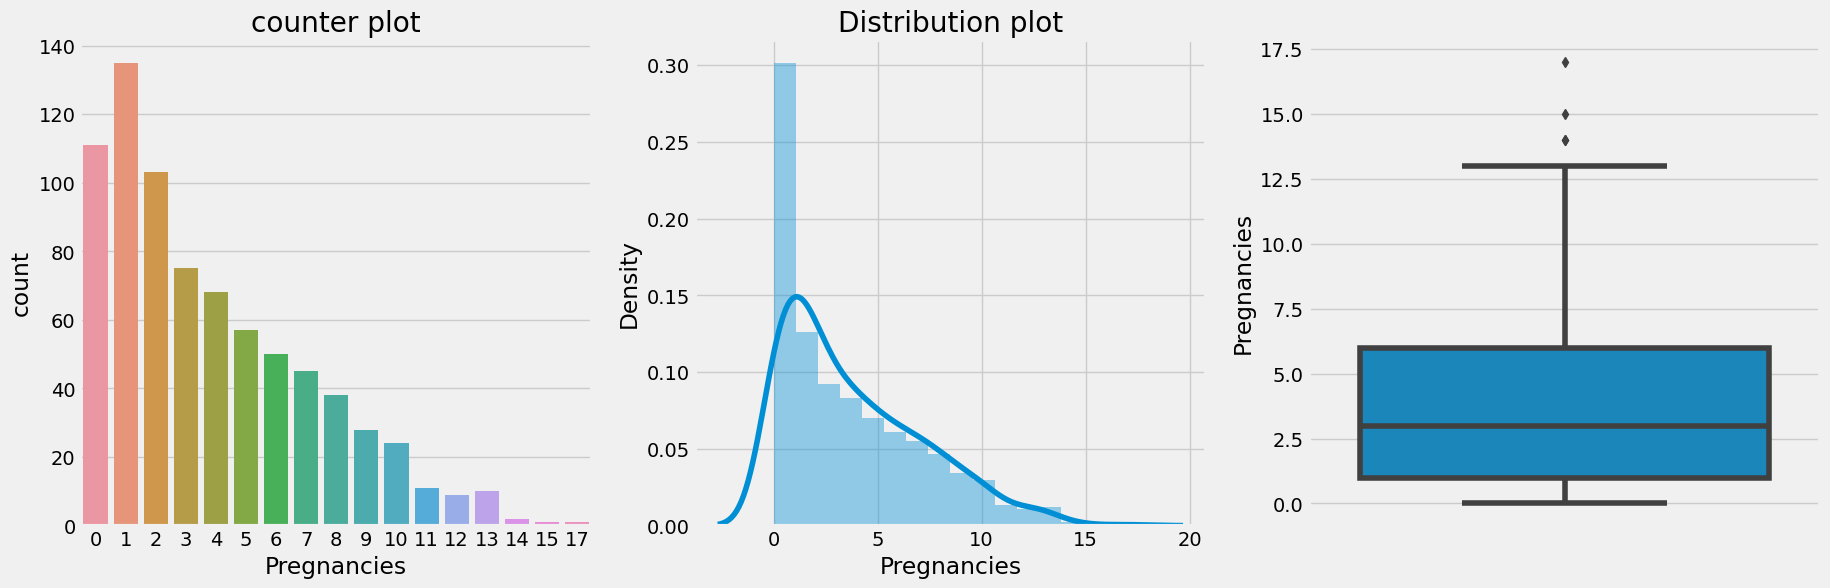

In [14]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('counter plot')
sns.countplot(x='Pregnancies',data=data)
plt.subplot(1,3,2)
plt.title('Distribution plot')
sns.distplot(data['Pregnancies'])
plt.subplot(1,3,3)
sns.boxplot(y=data['Pregnancies'])
plt.show()

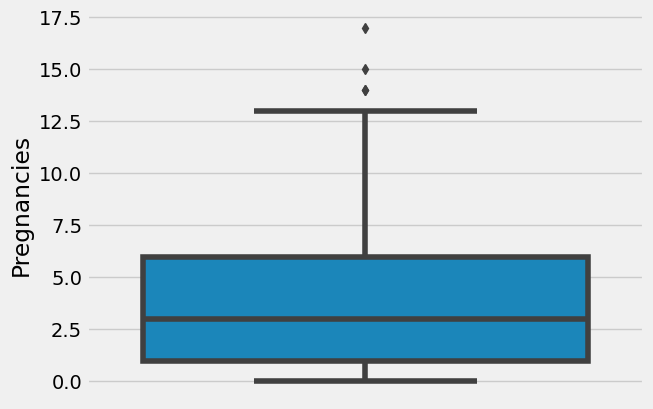

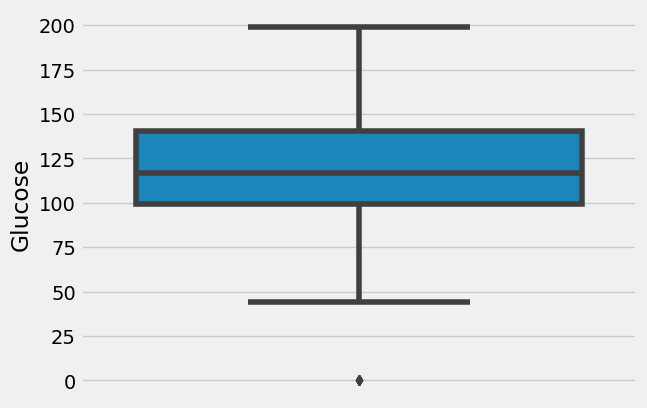

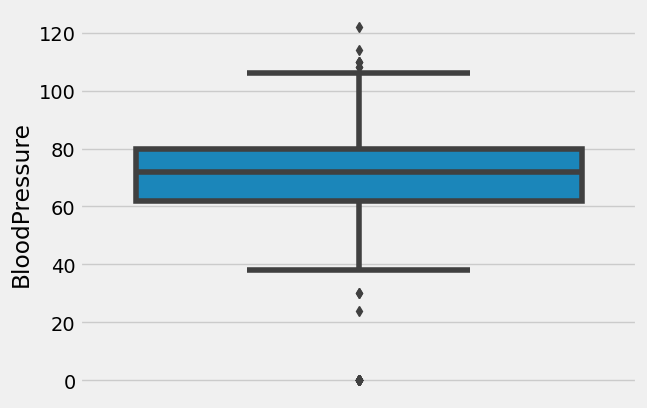

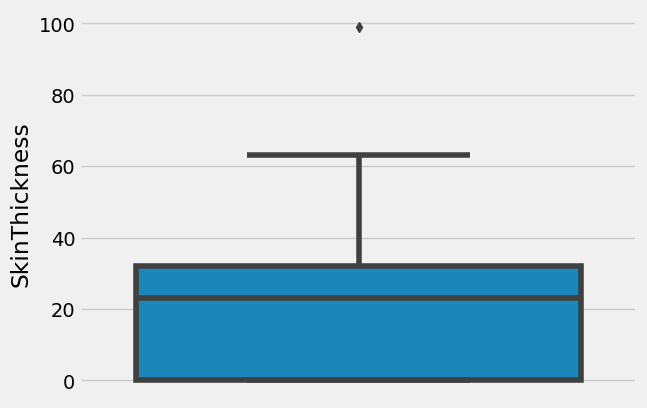

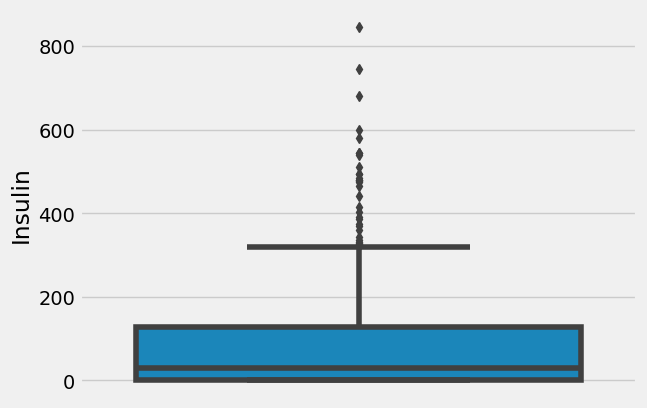

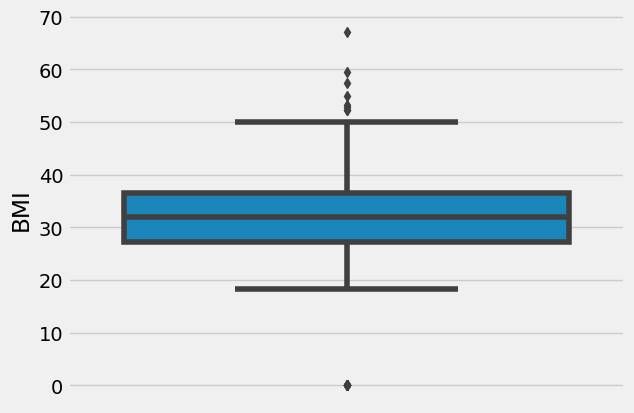

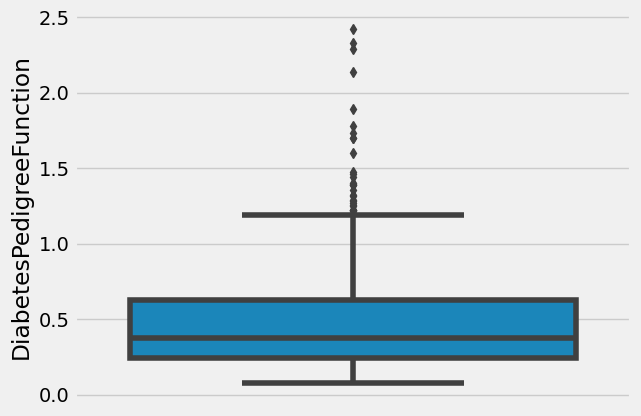

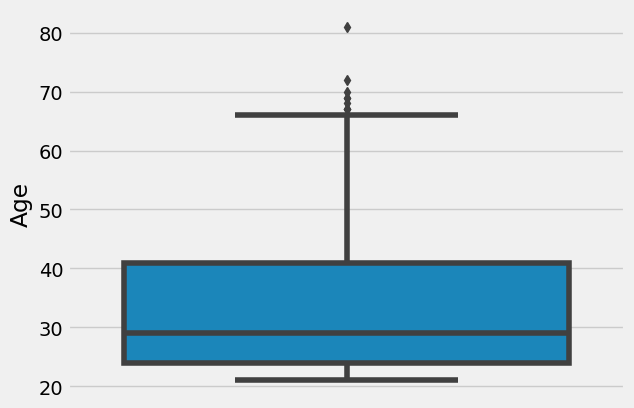

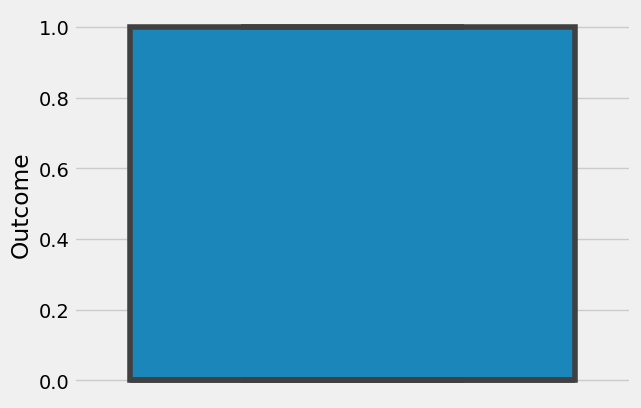

In [15]:
for i in data.select_dtypes(include='number').columns:
    sns.boxplot(y=data[i])
    plt.show()

In [16]:
(data==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [17]:
import numpy as np
cols_with_zeros=['Glucose','BloodPressure','SkinThickness','Insulin','BMI',]
for col in cols_with_zeros:
    data[col]-data[col].replace(0,np.nan)

In [18]:
data.fillna(data.median(),inplace=True)

In [19]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
import numpy as np

for col in data.select_dtypes(include='number').columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    median = data[col].median()
    
    # Replace outliers with median
    data[col] = np.where((data[col] < lower) | (data[col] > upper), median, data[col])


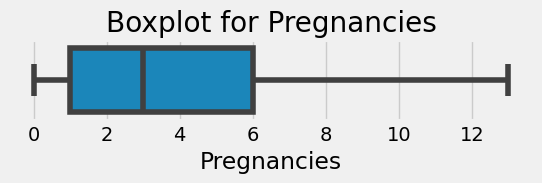

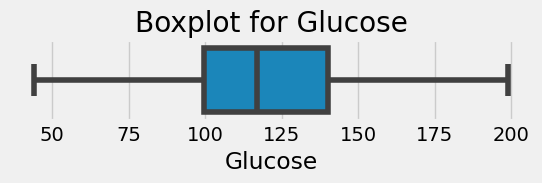

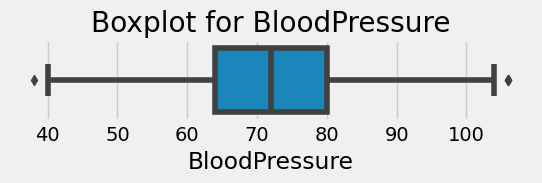

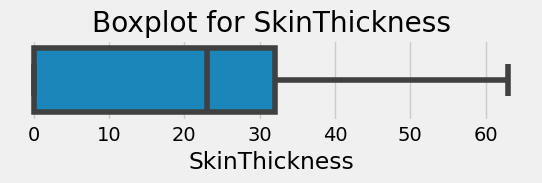

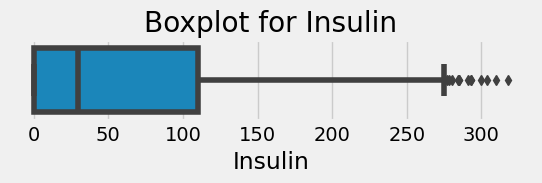

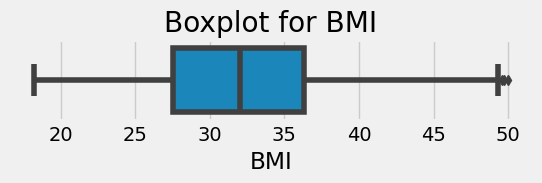

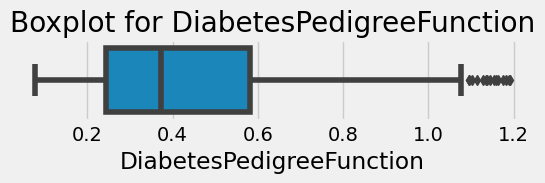

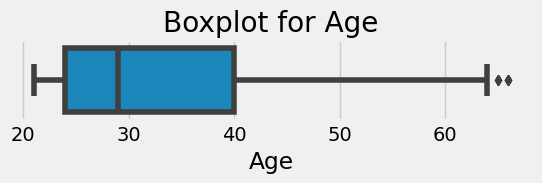

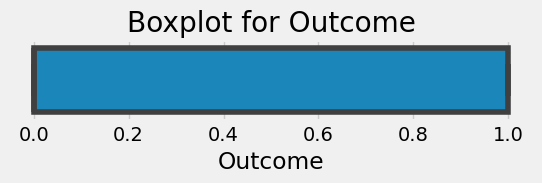

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(6,1))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [22]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [25]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier(n_estimators=100,class_weight='balanced')
model4= GradientBoostingClassifier(n_estimators=1000)

In [26]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

In [27]:
def cal(model):
    model.fit(x_train, y_train)
    pre = model.predict(x_test)

    accuracy = accuracy_score(y_test, pre)
    recall = recall_score(y_test, pre)
    f1 = f1_score(y_test, pre)

    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)

    sns.heatmap(confusion_matrix(pre, y_test), annot=True)

    print(model)
    print('accuracy is ', accuracy)
    print('recall_score is ', recall)
    print('f1_score is ', f1)


LogisticRegression()
accuracy is  0.7792207792207793
recall_score is  0.5384615384615384
f1_score is  0.6222222222222222


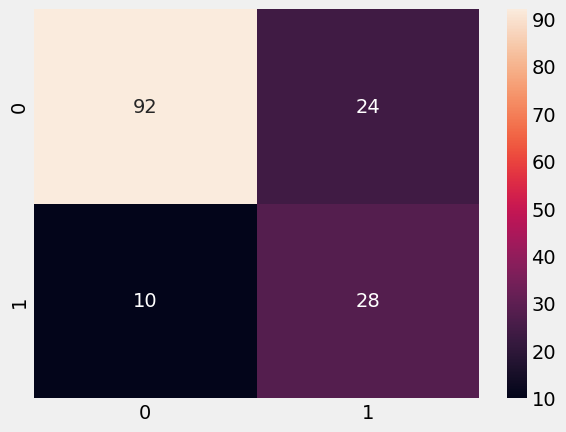

In [28]:
cal(model1)

SVC()
accuracy is  0.7987012987012987
recall_score is  0.5192307692307693
f1_score is  0.6352941176470589


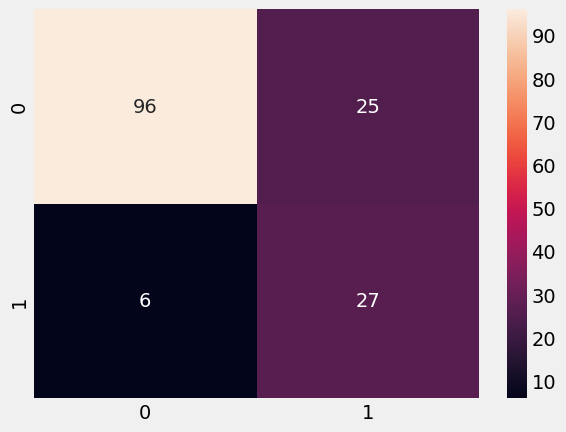

In [29]:
cal(model2)

RandomForestClassifier(class_weight='balanced')
accuracy is  0.7792207792207793
recall_score is  0.5769230769230769
f1_score is  0.6382978723404256


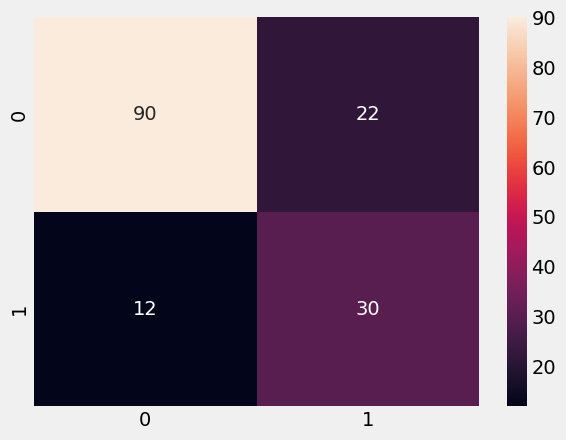

In [30]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is  0.7402597402597403
recall_score is  0.5192307692307693
f1_score is  0.574468085106383


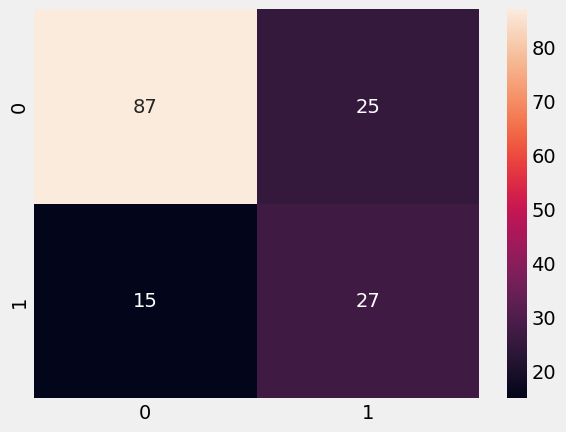

In [31]:
cal(model4)

In [32]:
result1

[0.7792207792207793,
 0.7987012987012987,
 0.7792207792207793,
 0.7402597402597403]

In [33]:
result3

[0.6222222222222222, 0.6352941176470589, 0.6382978723404256, 0.574468085106383]

In [34]:
print(len(result2))


4


In [35]:
for i, val in enumerate(result2):
    print(f"Model {i+1} recall_score = {val}")


Model 1 recall_score = 0.5384615384615384
Model 2 recall_score = 0.5192307692307693
Model 3 recall_score = 0.5769230769230769
Model 4 recall_score = 0.5192307692307693


In [36]:
final_result=pd.DataFrame({
    'Algorithem':columns,
    'accuracies':result1,
    'recall': result2,
    'Fscore': result3
})

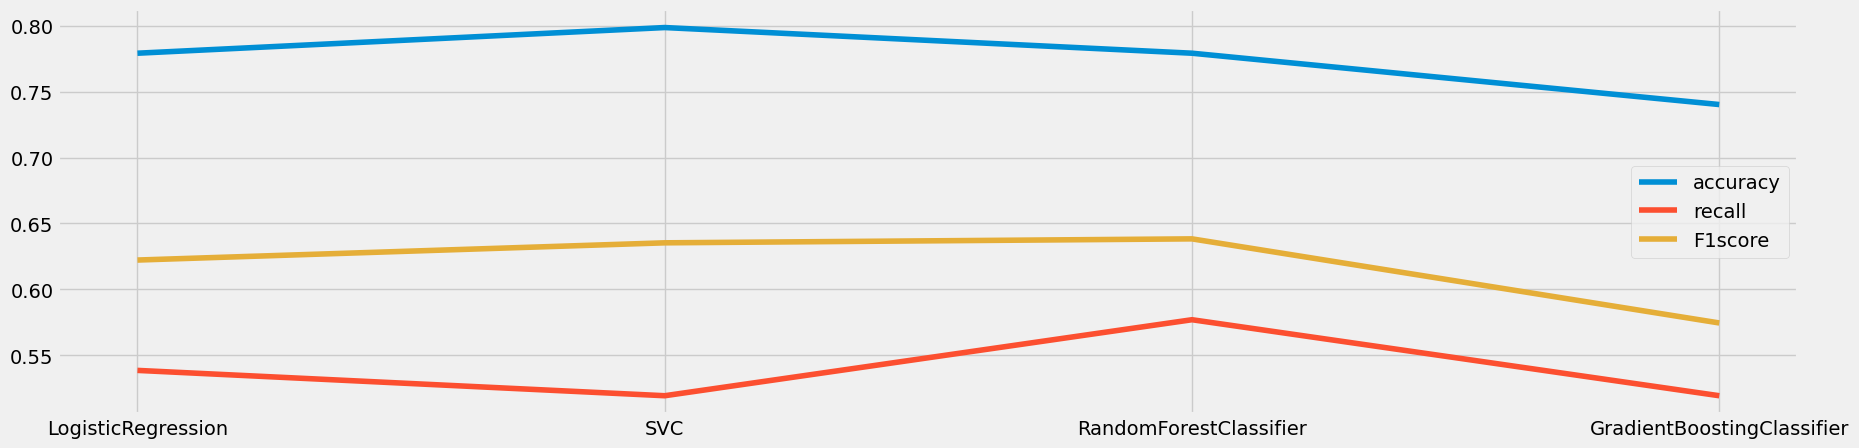

In [37]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(final_result.Algorithem,result1,label='accuracy')
plt.plot(final_result.Algorithem,result2,label='recall')
plt.plot(final_result.Algorithem,result3,label='F1score')
plt.legend()
plt.show()